In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker


In [2]:
%matplotlib inline

In [3]:
pd.set_option('display.max_colwidth', 200)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [4]:
sns.set_context(
    "notebook", 
    font_scale = 1.5,       
    rc = { 
        "figure.figsize" : (12, 9), 
        "axes.titlesize" : 18 
    }
)

In [60]:
data_set = pd.read_csv( "/home/andrew/Med_task/Task1/prol/DataSet.txt", sep=";")

In [61]:
data_set.head()

,DATA_TYPE,POLICY_ID,POLICY_BEGIN_MONTH,POLICY_END_MONTH,POLICY_IS_RENEWED,POLICY_SALES_CHANNEL,POLICY_SALES_CHANNEL_GROUP,POLICY_BRANCH,POLICY_MIN_AGE,POLICY_MIN_DRIVING_EXPERIENCE,VEHICLE_MAKE,VEHICLE_MODEL,VEHICLE_ENGINE_POWER,VEHICLE_IN_CREDIT,VEHICLE_SUM_INSURED,POLICY_INTERMEDIARY,INSURER_GENDER,POLICY_CLM_N,POLICY_CLM_GLT_N,POLICY_PRV_CLM_N,POLICY_PRV_CLM_GLT_N,CLIENT_HAS_DAGO,CLIENT_HAS_OSAGO,POLICY_COURT_SIGN,CLAIM_AVG_ACC_ST_PRD,POLICY_HAS_COMPLAINTS,POLICY_YEARS_RENEWED_N,POLICY_DEDUCT_VALUE,CLIENT_REGISTRATION_REGION,POLICY_PRICE_CHANGE
0,TRAIN,1,1,1,1,39,1,Москва,51,12,Land Rover,Discovery,245.0,0,1283202.0,856,F,0,0,N,N,1,0,0,0.0,0,0,0.0,Тульская,-1.00
1,TRAIN,2,1,1,1,50,5,Москва,35,7,Opel,Zafira,140.0,0,453000.0,N,M,0,0,0,0,1,1,0,0.0,0,4,0.0,Москва,-0.05
2,TRAIN,3,1,1,1,52,6,Москва,41,6,Kia,Soul,129.0,0,647718.0,N,F,0,0,1L,1L,0,0,0,0.0,0,1,12518.0,Московская,-0.07
3,TRAIN,4,1,1,1,50,5,Москва,36,12,Citroen,C-Crosser,170.0,0,757795.0,N,M,0,0,0,0,1,1,0,0.0,0,6,15000.0,Москва,0.05
4,TRAIN,5,1,1,0,52,6,Санкт-Петербург,42,5,Renault,Logan,102.0,0,604500.0,171,F,0,0,N,N,0,0,0,0.0,0,0,50000.0,Ленинградская,0.17


In [62]:
data_set

,DATA_TYPE,POLICY_ID,POLICY_BEGIN_MONTH,POLICY_END_MONTH,POLICY_IS_RENEWED,POLICY_SALES_CHANNEL,POLICY_SALES_CHANNEL_GROUP,POLICY_BRANCH,POLICY_MIN_AGE,POLICY_MIN_DRIVING_EXPERIENCE,VEHICLE_MAKE,VEHICLE_MODEL,VEHICLE_ENGINE_POWER,VEHICLE_IN_CREDIT,VEHICLE_SUM_INSURED,POLICY_INTERMEDIARY,INSURER_GENDER,POLICY_CLM_N,POLICY_CLM_GLT_N,POLICY_PRV_CLM_N,POLICY_PRV_CLM_GLT_N,CLIENT_HAS_DAGO,CLIENT_HAS_OSAGO,POLICY_COURT_SIGN,CLAIM_AVG_ACC_ST_PRD,POLICY_HAS_COMPLAINTS,POLICY_YEARS_RENEWED_N,POLICY_DEDUCT_VALUE,CLIENT_REGISTRATION_REGION,POLICY_PRICE_CHANGE
0,TRAIN,1,1,1,1,39,1,Москва,51,12,Land Rover,Discovery,245.0,0,1283202.0,856,F,0,0,N,N,1,0,0,0.0,0,0,0.0,Тульская,-1.00
1,TRAIN,2,1,1,1,50,5,Москва,35,7,Opel,Zafira,140.0,0,453000.0,N,M,0,0,0,0,1,1,0,0.0,0,4,0.0,Москва,-0.05
2,TRAIN,3,1,1,1,52,6,Москва,41,6,Kia,Soul,129.0,0,647718.0,N,F,0,0,1L,1L,0,0,0,0.0,0,1,12518.0,Московская,-0.07
3,TRAIN,4,1,1,1,50,5,Москва,36,12,Citroen,C-Crosser,170.0,0,757795.0,N,M,0,0,0,0,1,1,0,0.0,0,6,15000.0,Москва,0.05
4,TRAIN,5,1,1,0,52,6,Санкт-Петербург,42,5,Renault,Logan,102.0,0,604500.0,171,F,0,0,N,N,0,0,0,0.0,0,0,50000.0,Ленинградская,0.17
5,TRAIN,6,2,1,1,2,4,Санкт-Петербург,60,40,Suzuki,Grand Vitara,140.0,0,535815.0,174,M,0,0,0,0,0,0,0,0.0,0,3,7500.0,Санкт-Петербург,-0.02
6,TRAIN,7,1,1,1,52,6,Москва,41,6,Kia,Sorento,175.0,0,1696400.0,1372,F,0,0,N,N,0,0,0,0.0,0,0,0.0,Москва,-0.23
7,TRAIN,8,2,2,1,10,1,Санкт-Петербург,48,19,Hyundai,Santa Fe,197.0,0,1063317.0,1373,M,0,0,0,0,1,1,0,0.0,0,3,0.0,Санкт-Петербург,0.04
8,TRAIN,9,1,1,0,53,6,Москва,27,7,BMW,X3,245.0,0,2248000.0,849,F,1S,1S,N,N,0,0,0,4.0,0,0,0.0,Москва,-1.00
9,TEST,10,2,2,0,53,6,Санкт-Петербург,56,37,Skoda,Octavia,102.0,0,480930.0,224,M,0,0,0,0,0,1,0,0.0,0,1,15000.0,Санкт-Петербург,-0.04


In [52]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96605 entries, 0 to 96604
Data columns (total 30 columns):
DATA_TYPE                        96605 non-null object
POLICY_ID                        96605 non-null int64
POLICY_BEGIN_MONTH               96605 non-null int64
POLICY_END_MONTH                 96605 non-null int64
POLICY_IS_RENEWED                96605 non-null int64
POLICY_SALES_CHANNEL             96605 non-null int64
POLICY_SALES_CHANNEL_GROUP       96605 non-null int64
POLICY_BRANCH                    96605 non-null object
POLICY_MIN_AGE                   96605 non-null int64
POLICY_MIN_DRIVING_EXPERIENCE    96605 non-null int64
VEHICLE_MAKE                     96605 non-null object
VEHICLE_MODEL                    96605 non-null object
VEHICLE_ENGINE_POWER             96605 non-null float64
VEHICLE_IN_CREDIT                96605 non-null int64
VEHICLE_SUM_INSURED              96605 non-null float64
POLICY_INTERMEDIARY              96605 non-null object
INSURER_GENDER    

In [71]:
data_set = data_set.replace(to_replace=['M', 'F'], value=[1, 0])

In [72]:
train_df = data_set[data_set['DATA_TYPE'] == "TRAIN"]
test_df = data_set[data_set['DATA_TYPE'] != "TRAIN"]

In [12]:
train_df.describe()

,POLICY_ID,POLICY_BEGIN_MONTH,POLICY_END_MONTH,POLICY_IS_RENEWED,POLICY_SALES_CHANNEL,POLICY_SALES_CHANNEL_GROUP,POLICY_MIN_AGE,POLICY_MIN_DRIVING_EXPERIENCE,VEHICLE_ENGINE_POWER,VEHICLE_IN_CREDIT,VEHICLE_SUM_INSURED,INSURER_GENDER,CLIENT_HAS_DAGO,CLIENT_HAS_OSAGO,POLICY_COURT_SIGN,CLAIM_AVG_ACC_ST_PRD,POLICY_HAS_COMPLAINTS,POLICY_DEDUCT_VALUE,POLICY_PRICE_CHANGE
count,77407.000000,77407.000000,77407.000000,77407.000000,77407.000000,77407.000000,77407.000000,77407.000000,77407.000000,77407.000000,7.740700e+04,77407.000000,77407.000000,77407.000000,77407.000000,77407.000000,77407.000000,77407.000000,77407.000000
mean,48324.885140,6.888033,6.866046,0.624956,47.354064,5.123916,42.627359,35.122017,154.274499,0.320410,9.800583e+05,0.632023,0.275970,0.550041,0.000982,3.903052,0.007299,5965.020556,-0.033503
std,27874.346113,3.396889,3.400070,0.484137,14.036828,1.585383,10.715267,200.828668,54.257499,0.466637,6.876203e+05,0.482258,0.447005,0.497493,0.031319,17.933455,0.085123,10397.744838,0.837380
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,18.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,24159.500000,4.000000,4.000000,0.000000,50.000000,5.000000,34.000000,8.000000,123.000000,0.000000,5.582460e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.170000
50%,48343.000000,7.000000,7.000000,1.000000,52.000000,6.000000,41.000000,14.000000,146.000000,0.000000,8.075000e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,72424.500000,10.000000,10.000000,1.000000,53.000000,6.000000,50.000000,19.000000,171.000000,1.000000,1.164990e+06,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,10000.000000,0.050000
max,96605.000000,12.000000,12.000000,1.000000,63.000000,8.000000,86.000000,2015.000000,2000.000000,1.000000,9.449000e+06,1.000000,1.000000,1.000000,1.000000,737.000000,1.000000,120873.000000,60.020000


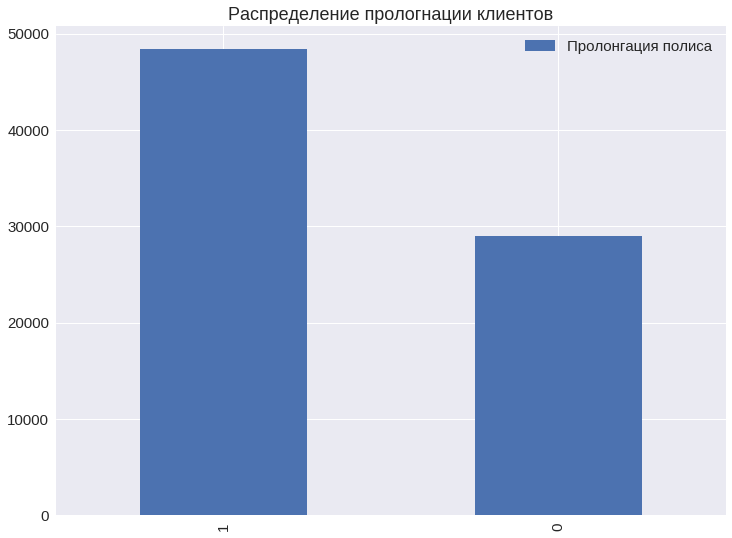

In [13]:
train_df['POLICY_IS_RENEWED'].value_counts().plot(kind='bar', label='Пролонгация полиса')
plt.legend()
plt.title('Распределение прологнации клиентов');

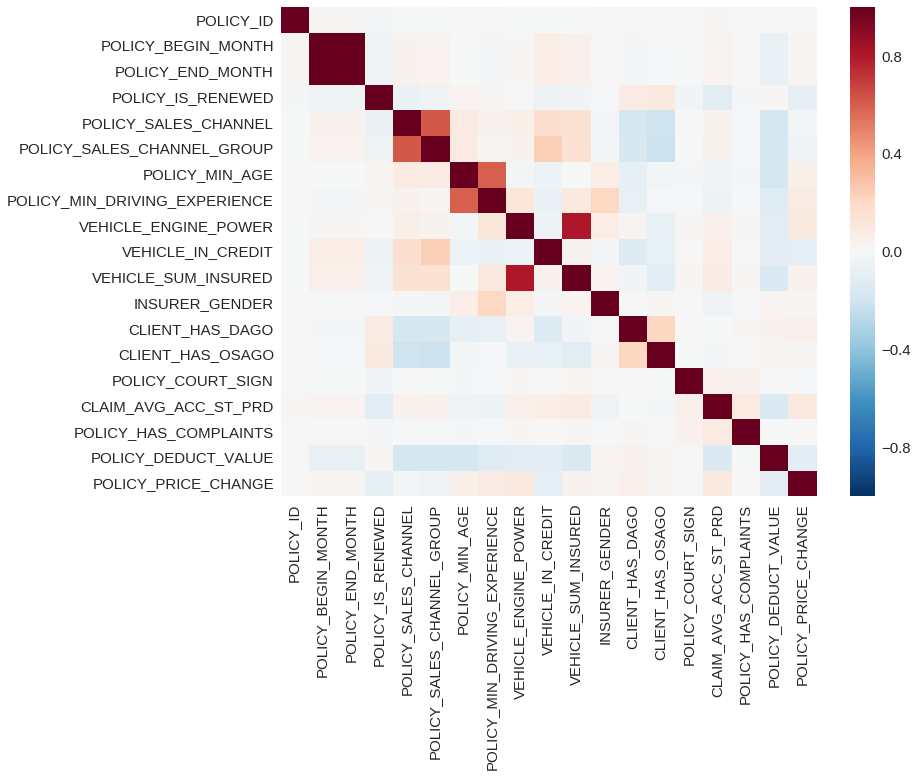

In [14]:
corr_matrix = train_df.drop(['DATA_TYPE', 'POLICY_BRANCH', 'VEHICLE_MAKE', 'VEHICLE_MODEL', 'POLICY_INTERMEDIARY',
                      'POLICY_CLM_N', 'POLICY_CLM_GLT_N', 'POLICY_PRV_CLM_N', 'POLICY_PRV_CLM_GLT_N'], axis=1).corr(method='spearman')
sns.heatmap(corr_matrix)

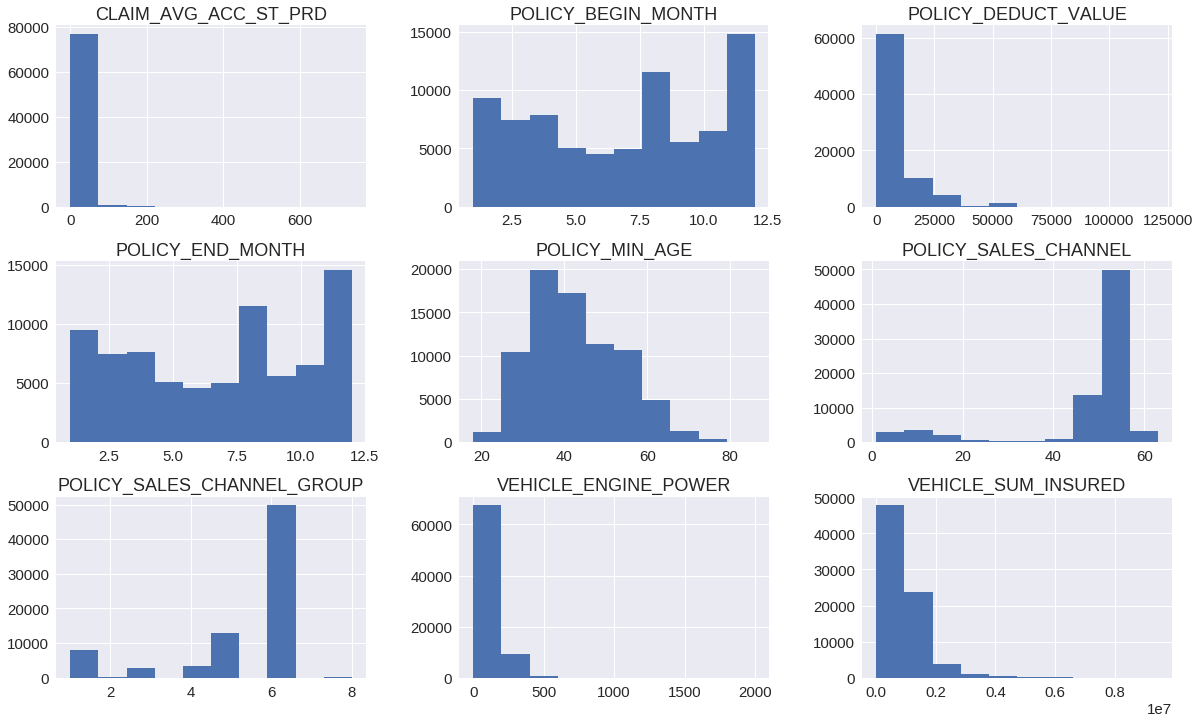

In [15]:
features = list(set(train_df.columns) - set(['DATA_TYPE', 'POLICY_IS_RENEWED', 'POLICY_ID', 'POLICY_BRANCH',  'VEHICLE_MAKE', 'VEHICLE_MODEL', 'POLICY_INTERMEDIARY',
                      'POLICY_CLM_N', 'POLICY_CLM_GLT_N', 'POLICY_PRV_CLM_N', 'POLICY_PRV_CLM_GLT_N',
                        'CLIENT_HAS_DAGO', 'CLIENT_HAS_OSAGO', 'POLICY_YEARS_RENEWED_N', 'INSURER_GENDER',
                        'POLICY_MIN_DRIVING_EXPERIENCE', 'POLICY_HAS_COMPLAINTS', 'POLICY_COURT_SIGN', 
                        'VEHICLE_IN_CREDIT', 'POLICY_PRICE_CHANGE']))
train_df[features].hist(figsize=(20,12));

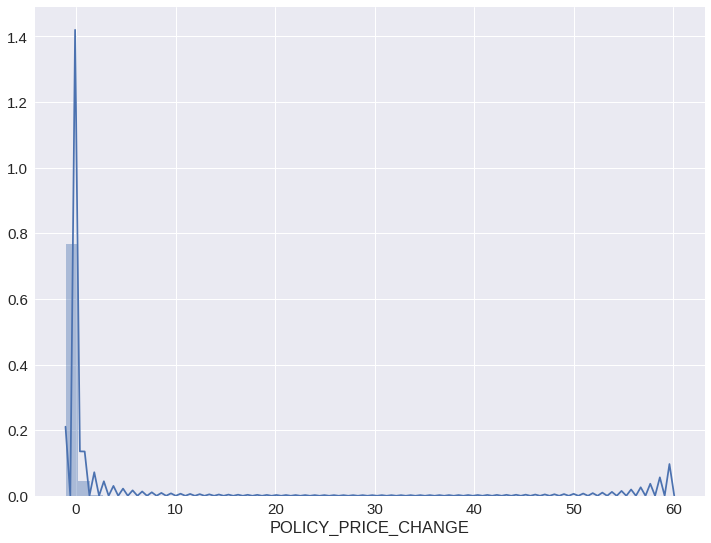

In [16]:
sns.distplot(train_df['POLICY_PRICE_CHANGE'])

In [17]:
train_df.reset_index().head()

,index,DATA_TYPE,POLICY_ID,POLICY_BEGIN_MONTH,POLICY_END_MONTH,POLICY_IS_RENEWED,POLICY_SALES_CHANNEL,POLICY_SALES_CHANNEL_GROUP,POLICY_BRANCH,POLICY_MIN_AGE,POLICY_MIN_DRIVING_EXPERIENCE,VEHICLE_MAKE,VEHICLE_MODEL,VEHICLE_ENGINE_POWER,VEHICLE_IN_CREDIT,VEHICLE_SUM_INSURED,POLICY_INTERMEDIARY,INSURER_GENDER,POLICY_CLM_N,POLICY_CLM_GLT_N,POLICY_PRV_CLM_N,POLICY_PRV_CLM_GLT_N,CLIENT_HAS_DAGO,CLIENT_HAS_OSAGO,POLICY_COURT_SIGN,CLAIM_AVG_ACC_ST_PRD,POLICY_HAS_COMPLAINTS,POLICY_YEARS_RENEWED_N,POLICY_DEDUCT_VALUE,CLIENT_REGISTRATION_REGION,POLICY_PRICE_CHANGE
0,0,TRAIN,1,1,1,1,39,1,Москва,51,12,Land Rover,Discovery,245.0,0,1283202.0,856,0,0,0,N,N,1,0,0,0.0,0,0,0.0,Тульская,-1.00
1,1,TRAIN,2,1,1,1,50,5,Москва,35,7,Opel,Zafira,140.0,0,453000.0,N,1,0,0,0,0,1,1,0,0.0,0,4,0.0,Москва,-0.05
2,2,TRAIN,3,1,1,1,52,6,Москва,41,6,Kia,Soul,129.0,0,647718.0,N,0,0,0,1L,1L,0,0,0,0.0,0,1,12518.0,Московская,-0.07
3,3,TRAIN,4,1,1,1,50,5,Москва,36,12,Citroen,C-Crosser,170.0,0,757795.0,N,1,0,0,0,0,1,1,0,0.0,0,6,15000.0,Москва,0.05
4,4,TRAIN,5,1,1,0,52,6,Санкт-Петербург,42,5,Renault,Logan,102.0,0,604500.0,171,0,0,0,N,N,0,0,0,0.0,0,0,50000.0,Ленинградская,0.17


In [18]:
#Test CatBoost from Yandex
from catboost import Pool, CatBoostClassifier, cv, CatboostIpythonWidget

In [19]:
X = train_df.drop(['DATA_TYPE', 'POLICY_ID', 'POLICY_IS_RENEWED'], axis=1)
y = train_df.POLICY_IS_RENEWED

In [20]:
categorical_features_indices = np.where(X.dtypes != np.float)[0]

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.85, random_state=1234)

In [22]:
model = CatBoostClassifier(
    custom_loss=['Accuracy'],
    random_seed=42
)

In [23]:
%%time
model.fit(
    X_train, y_train,
    cat_features=categorical_features_indices,
    eval_set=(X_validation, y_validation),
    plot=True
)

CPU times: user 19min 23s, sys: 18.5 s, total: 19min 42s
Wall time: 12min 36s


In [24]:
%%time
cv_data = cv(
    model.get_params(),
    Pool(X, label=y, cat_features=categorical_features_indices),
)

/home/andrew/.local/lib/python3.5/site-packages/catboost/core.py:1424: UserWarning: Parameter "use_best_model" has no effect in cross-validation and is ignored
  warnings.warn('Parameter "use_best_model" has no effect in cross-validation and is ignored')


CPU times: user 50min 6s, sys: 54.3 s, total: 51min 1s
Wall time: 34min 7s


In [25]:
print('Best validation accuracy score: {:.2f}±{:.2f} on step {}'.format(
    np.max(cv_data['Accuracy_test_avg']),
    cv_data['Accuracy_test_stddev'][np.argmax(cv_data['Accuracy_test_avg'])],
    np.argmax(cv_data['Accuracy_test_avg'])
))

Best validation accuracy score: 0.72±0.00 on step 493


In [26]:
model_without_seed = CatBoostClassifier(iterations=10)
model_without_seed.fit(X, y, cat_features=categorical_features_indices)

print('Random seed assigned for this model: {}'.format(model_without_seed.random_seed_))

Random seed assigned for this model: 52523675626650


In [27]:
model_simple = CatBoostClassifier(
    eval_metric='Accuracy',
    iterations=500,
    random_seed=42
)

model_with_earlystop = CatBoostClassifier(
    eval_metric='Accuracy',
    iterations=500,
    od_type='Iter',
    od_wait=20,
    random_seed=42
)

model_simple.fit(
    X_train, y_train,
    cat_features=categorical_features_indices,
    eval_set=(X_validation, y_validation),
)

model_with_earlystop.fit(
    X_train, y_train,
    cat_features=categorical_features_indices,
    eval_set=(X_validation, y_validation),
)

In [29]:
print('Simple model tree count: {}'.format(model_simple.tree_count_))

print('Early-stopped model tree count: {}'.format(model_with_earlystop.tree_count_))

Simple model tree count: 500
Early-stopped model tree count: 208


In [31]:
model_simple = CatBoostClassifier(
    eval_metric='Accuracy',
    iterations=500,
    od_type='Iter',
    od_wait=20,
    use_best_model=False,
    random_seed=42
)

model_with_earlystop = CatBoostClassifier(
    eval_metric='Accuracy',
    iterations=500,
    od_type='Iter',
    od_wait=20,
    use_best_model=True,
    random_seed=42
)

model_simple.fit(
    X_train, y_train,
    cat_features=categorical_features_indices,
    eval_set=(X_validation, y_validation),
)

model_with_earlystop.fit(
    X_train, y_train,
    cat_features=categorical_features_indices,
    eval_set=(X_validation, y_validation),
)

In [32]:
from sklearn.metrics import accuracy_score

print('Simple model validation accuracy: {:.4}'.format(
    accuracy_score(y_validation, model_simple.predict(X_validation))))

print('Early-stopped model validation accuracy: {:.4}'.format(
    accuracy_score(y_validation, model_with_earlystop.predict(X_validation))))

Simple model validation accuracy: 0.7169
Early-stopped model validation accuracy: 0.7174


In [33]:
model_with_earlystop.save_model('catboost_model_model_with_earlystop.dump')
model_simple.save_model('catboost_model_simple.dump')
model.save_model('catboost_model.dump')
model_without_seed.save_model('catboost_model_without_seed.dump')

In [40]:
print('Precise validation accuracy score: {}'.format(np.max(cv_data['Accuracy_test_avg'])))

Precise validation accuracy score: 0.7187814898069917


In [74]:
X_test = test_df

In [43]:
%%time
model.fit(X, y, cat_features=categorical_features_indices)


CPU times: user 20min 42s, sys: 21.2 s, total: 21min 3s
Wall time: 11min 41s


In [ ]:
submisstion.to_csv('submission.csv', index=False)